In [1]:
# Saurabh Chatterjee - 22EE65R14

In [6]:
import sklearn as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
#Importing Olivetti Dataset
#Has face images of 40 people and 10 images of each - so total 400 images, each 64X64 pixels

from sklearn import datasets
oliv = datasets.fetch_olivetti_faces()   

In [8]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [9]:
oliv['data'].shape , oliv['images'].shape , oliv['target'].shape

((400, 4096), (400, 64, 64), (400,))

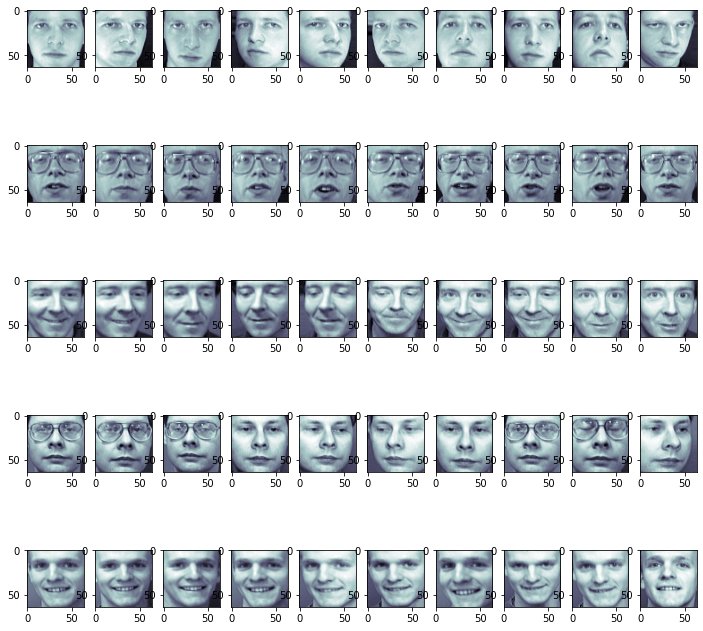

In [48]:
#Plotting the Face Figures - Selecting 50 face images of 5 people with 10 face images each

fig = plt.figure(figsize=(12,12))
for i in range(50):
    ax= fig.add_subplot(5,10,i+1)                         #Subplot with 5 rows and 10 cols (images) each row
    ax.imshow(oliv.images[i] , cmap=plt.cm.bone)
plt.show()

In [11]:
x = oliv.data
y = oliv.target

In [12]:
x

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [13]:
x.shape                                  # Total 400 images, each 64X64 pixels = 4096 pixels as features for each image

(400, 4096)

In [14]:
x = x - np.mean(x, axis=0)               # Make zero mean

In [15]:
R = 1/100*x.T.dot(x)                     # Find Auto-Correlation Matrix - Square Matrix with Number of Features as Rows & Cols
R.shape

(4096, 4096)

In [16]:
values, vectors = np.linalg.eig(R)                   # Eigen Values & Eigen Vectors of Auto-Correlation Matrix R

In [17]:
values                                               # Eigen Values

array([7.5172302e+01, 4.4176331e+01, 2.5155413e+01, ..., 1.2140116e-08,
       1.2124953e-08, 1.3544708e-08], dtype=float32)

In [18]:
values.size                                 # Number of Eigen Values = Number of Features

4096

In [19]:
values_desc = sorted(values, reverse=True)               # Sorting Eigen Values in Descending Order
values_desc

[75.1723,
 44.17633,
 25.155413,
 15.77879,
 11.39561,
 9.965862,
 7.661052,
 6.4285235,
 6.1813974,
 5.2785735,
 5.0358143,
 4.5362716,
 3.9357266,
 3.6212833,
 3.3553035,
 3.086479,
 2.9013002,
 2.5746112,
 2.37984,
 2.3580902,
 2.2052784,
 1.9402654,
 1.8433498,
 1.7985066,
 1.7242213,
 1.678967,
 1.622021,
 1.5652775,
 1.4447592,
 1.3927329,
 1.2690437,
 1.2128149,
 1.142611,
 1.0560873,
 1.0113816,
 0.9976815,
 0.9632926,
 0.9427336,
 0.890666,
 0.8649869,
 0.8200512,
 0.8017997,
 0.77198917,
 0.75712836,
 0.7288775,
 0.7147624,
 0.70171624,
 0.69589686,
 0.65952384,
 0.64709294,
 0.6213962,
 0.6043272,
 0.5841555,
 0.5648766,
 0.5606755,
 0.5444954,
 0.53219116,
 0.51824796,
 0.5110419,
 0.500021,
 0.4906578,
 0.48057067,
 0.47338754,
 0.46629962,
 0.45018953,
 0.44384006,
 0.43229714,
 0.42292675,
 0.4132738,
 0.40634364,
 0.4022661,
 0.39848924,
 0.39081562,
 0.38302773,
 0.37213528,
 0.36265925,
 0.36045828,
 0.34782913,
 0.34625655,
 0.34290203,
 0.33631042,
 0.33050433,
 0.3

In [ ]:
# Visualizing Top-5 Eigen Vectors - Images

In [39]:
vectors_5 = vectors[:,:5]
vectors_5.shape               # Selecting Eigen Vectors corresponding to Top K=5 Dominating Eigen Values

(4096, 5)

In [40]:
# PCA = Data reduced to lower feature components = Projection in lesser number of features

x_reduced_5 = np.dot(x, vectors_5)
x_reduced_5.shape                    

(400, 5)

In [41]:
# Reconstruction of Origiinal Data with Lesser PCAs (K=5)

x_recons_5 = np.dot(x_reduced_5, vectors_5.T)
x_recons_5.shape

(400, 4096)

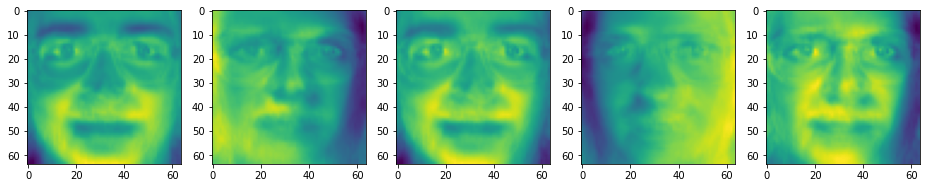

In [43]:
# Image Data After PCA (Top K=5 Features selected out of 4096 features)

x_recons_5_img = x_recons_5.reshape(400,64,64)
fig = plt.figure(figsize = (16,16))
for i in range(5):
    bx = fig.add_subplot(1,5,i+1)
    bx.imshow(x_recons_5_img[i])
plt.show()

In [ ]:
# PCA with K such that Error is Less than 5%

In [44]:
# Let Error = 5%  

sum_eig = sum(values)

sum_eig * 0.05 

for k in range (1,4096):
    if (sum(values)-sum(values[:k]))/sum(values) < 0.05 :
        break
print(k)

123


In [45]:
# Plotting Error vs K

err =[]*4096
for m in range (1,4096):
    err_val=(sum(values)-sum(values[:m]))/sum(values)*100
    err.append(err_val)

len(err)

4095

Text(0.5, 1.0, 'Error vs Number of PCA Components Considered')

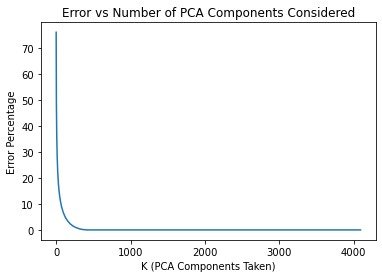

In [46]:
plt.plot(err)
plt.ylabel('Error Percentage')
plt.xlabel('K (PCA Components Taken)')
plt.title("Error vs Number of PCA Components Considered")

In [47]:
np.sum(values)

315.68115

In [24]:
min_k = min(values_desc[:k])                # Finding the Minimum of Top K Eigen Values
min_k

0.17492901

In [25]:
values.size

4096

In [26]:
loc = []*4096

for i in range(0,values.size-1):
    if values[i] >= min_k:
        loc.append(i)
    
loc                               #Storing location of Eigen Values with values greater than the Minimum of Top 100 Values

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122]

In [27]:
values_k = values[:k]
values_k.shape                                # Selecting Top K = 123 Eigen Values (Dominating ones)

(123,)

In [28]:
vectors            # Eigen Vectors (Matrix A)

array([[-4.19110339e-03,  2.85913926e-02, -1.35690789e-03, ...,
        -4.44606133e-03,  2.48409305e-02, -7.79503171e-05],
       [-7.10950093e-03,  3.32883634e-02,  3.25797038e-04, ...,
        -6.46195561e-03, -1.10937497e-02, -2.70489771e-02],
       [-9.33609344e-03,  3.78464982e-02,  1.97989008e-04, ...,
        -6.08642586e-04, -1.22666906e-03, -2.10185605e-03],
       ...,
       [ 1.85158497e-04, -2.96278279e-02,  1.54136522e-02, ...,
         1.22851441e-02, -1.67210680e-02,  1.61479414e-02],
       [ 3.37965507e-03, -2.72129867e-02,  1.37097845e-02, ...,
        -1.33814011e-02, -8.69676378e-03,  4.03732900e-03],
       [ 3.18825617e-03, -2.48889923e-02,  1.18834134e-02, ...,
         1.66801084e-02, -6.58639381e-03, -6.86283316e-03]], dtype=float32)

In [29]:
vectors.shape

(4096, 4096)

In [33]:
vectors_k = vectors[:,:k]
vectors_k.shape               # Selecting Eigen Vectors corresponding to Top K=123 Dominating Eigen Values

(4096, 123)

In [34]:
# PCA = Data reduced to lower feature components = Projection in lesser number of features

x_reduced = np.dot(x, vectors_k)
x_reduced.shape                    

(400, 123)

In [35]:
# Reconstruction of Origiinal Data with Lesser PCAs (K=123)

x_recons = np.dot(x_reduced, vectors_k.T)
x_recons.shape

(400, 4096)

In [36]:
x_recons

array([[-0.10841145, -0.05427731, -0.05734894, ..., -0.14853708,
        -0.16521391, -0.1302389 ],
       [ 0.1332839 ,  0.07560089,  0.02416535, ..., -0.19060853,
        -0.16519731, -0.22107513],
       [-0.1002172 , -0.07648788, -0.02229199, ..., -0.16537906,
        -0.17970717, -0.17650525],
       ...,
       [ 0.05853625,  0.07504819,  0.115575  , ..., -0.13177674,
        -0.14756331, -0.12121867],
       [-0.11013734, -0.12213085, -0.17755906, ...,  0.2423074 ,
         0.26608014,  0.26064777],
       [ 0.03254991, -0.01818285, -0.13713783, ...,  0.01769156,
        -0.00064184,  0.06271475]], dtype=float32)

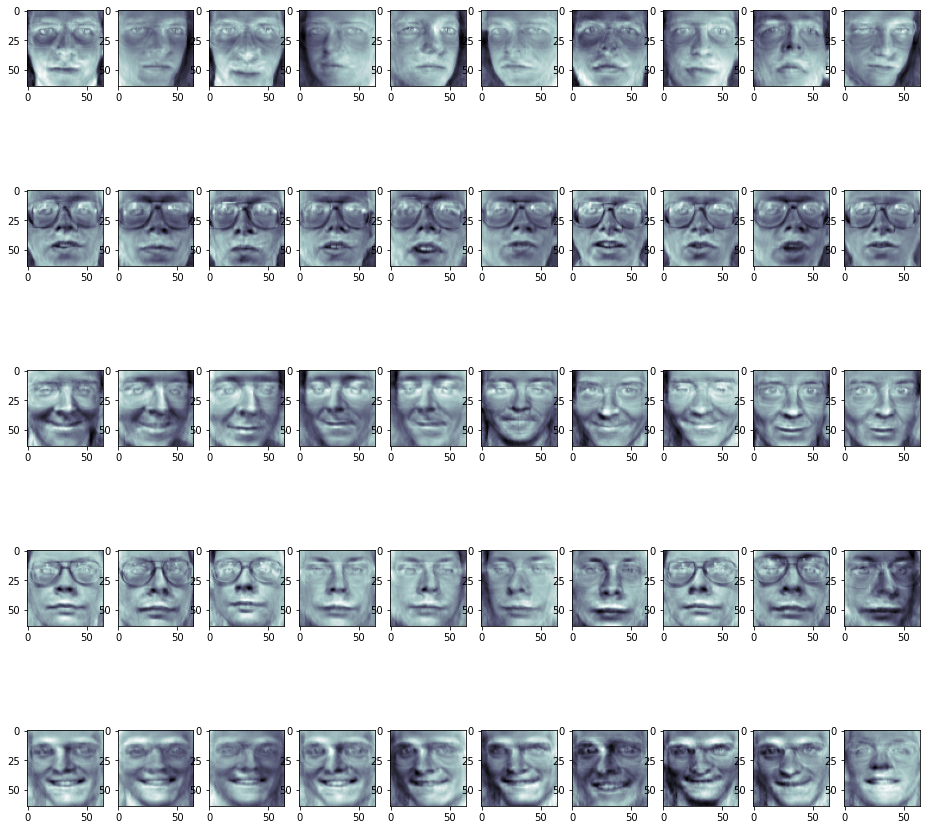

In [37]:
# Image Data After PCA (Top K=123 Features selected out of 4096 features)

x_recons_img = x_recons.reshape(400,64,64)
fig = plt.figure(figsize = (16,16))
for i in range(50):
    ax = fig.add_subplot(5,10,i+1)
    ax.imshow(x_recons_img[i] , cmap = plt.cm.bone)
plt.show()

In [38]:
error=(x_recons[1,:]-x[1,:])
sq_err=np.square(error)
MSE = np.mean(sq_err)
MSE

0.0010501652

In [ ]:
# Visualizing for 1%, 5%, 10% & 20% Error

In [52]:
# Value of K for 1% Error 
for k1 in range (1,4096):
    if (sum(values)-sum(values[:k1]))/sum(values) < 0.01 :
        break
print("Value of K for 1% Error: ",k1)

# Value of K for 1% Error 
for k5 in range (1,4096):
    if (sum(values)-sum(values[:k5]))/sum(values) < 0.05 :
        break
print("Value of K for 5% Error: ",k5)

# Value of K for 1% Error 
for k10 in range (1,4096):
    if (sum(values)-sum(values[:k10]))/sum(values) < 0.1 :
        break
print("Value of K for 10% Error: ",k10)

# Value of K for 1% Error 
for k20 in range (1,4096):
    if (sum(values)-sum(values[:k20]))/sum(values) < 0.2 :
        break
print("Value of K for 20% Error: ",k20)

Value of K for 1% Error:  261
Value of K for 5% Error:  123
Value of K for 10% Error:  66
Value of K for 20% Error:  27
